In [43]:
#load common utilities
import os
from datetime import datetime
import glob

#load data analysis packages
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sb
sb.set()
import squarify
from pywaffle import Waffle

data_path = "../data"

In [44]:
mobility_df = pd.read_csv(f'{data_path}/raw/mobility/2020_US_Region_Mobility_Report.csv')

In [45]:
mobility_df.columns

Index(['country_region_code', 'country_region', 'sub_region_1', 'sub_region_2',
       'metro_area', 'iso_3166_2_code', 'census_fips_code', 'date',
       'retail_and_recreation_percent_change_from_baseline',
       'grocery_and_pharmacy_percent_change_from_baseline',
       'parks_percent_change_from_baseline',
       'transit_stations_percent_change_from_baseline',
       'workplaces_percent_change_from_baseline',
       'residential_percent_change_from_baseline'],
      dtype='object')

In [46]:
mobility_df.tail()

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
843017,US,United States,Wyoming,Weston County,NaN,NaN,56045.0,2021-01-06,NaN,NaN,NaN,NaN,-19.0,NaN
843018,US,United States,Wyoming,Weston County,NaN,NaN,56045.0,2021-01-07,NaN,NaN,NaN,NaN,-12.0,NaN
843019,US,United States,Wyoming,Weston County,NaN,NaN,56045.0,2021-01-08,NaN,NaN,NaN,NaN,-12.0,NaN
843020,US,United States,Wyoming,Weston County,NaN,NaN,56045.0,2021-01-11,NaN,NaN,NaN,NaN,-12.0,NaN
843021,US,United States,Wyoming,Weston County,NaN,NaN,56045.0,2021-01-12,NaN,NaN,NaN,NaN,-10.0,NaN


In [47]:
# Rename columns to state and county
mobility_df = mobility_df.rename(columns={'sub_region_1': 'state', 'sub_region_2': 'county'})
mobility_df.tail()

,country_region_code,country_region,state,county,metro_area,iso_3166_2_code,census_fips_code,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
843017,US,United States,Wyoming,Weston County,NaN,NaN,56045.0,2021-01-06,NaN,NaN,NaN,NaN,-19.0,NaN
843018,US,United States,Wyoming,Weston County,NaN,NaN,56045.0,2021-01-07,NaN,NaN,NaN,NaN,-12.0,NaN
843019,US,United States,Wyoming,Weston County,NaN,NaN,56045.0,2021-01-08,NaN,NaN,NaN,NaN,-12.0,NaN
843020,US,United States,Wyoming,Weston County,NaN,NaN,56045.0,2021-01-11,NaN,NaN,NaN,NaN,-12.0,NaN
843021,US,United States,Wyoming,Weston County,NaN,NaN,56045.0,2021-01-12,NaN,NaN,NaN,NaN,-10.0,NaN


In [48]:
# Identify county to filter by 
mobility_df = mobility_df[mobility_df['county'].isna() == False]
mobility_df[mobility_df['county'].str.startswith('Phil')]['county'].unique()

array(['Phillips County', 'Philadelphia County'], dtype=object)

In [49]:
# Identify data for Philadelphia County
mobility_df = mobility_df[mobility_df['county'] == 'Philadelphia County']
mobility_df.head()

,country_region_code,country_region,state,county,metro_area,iso_3166_2_code,census_fips_code,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
617327,US,United States,Pennsylvania,Philadelphia County,NaN,NaN,42101.0,2020-02-15,6.0,0.0,26.0,1.0,3.0,1.0
617328,US,United States,Pennsylvania,Philadelphia County,NaN,NaN,42101.0,2020-02-16,5.0,2.0,38.0,0.0,0.0,0.0
617329,US,United States,Pennsylvania,Philadelphia County,NaN,NaN,42101.0,2020-02-17,2.0,-3.0,35.0,-16.0,-25.0,6.0
617330,US,United States,Pennsylvania,Philadelphia County,NaN,NaN,42101.0,2020-02-18,4.0,0.0,40.0,4.0,2.0,0.0
617331,US,United States,Pennsylvania,Philadelphia County,NaN,NaN,42101.0,2020-02-19,0.0,-1.0,47.0,2.0,2.0,0.0


In [50]:
# Split date column into year, month, day columns
date_df = mobility_df['date'].str.split('-', expand = True).reset_index()
date_df = date_df.rename(columns = {0:'year', 1:'month', 2:'day'})
date_df.head()

,index,year,month,day
0,617327,2020,02,15
1,617328,2020,02,16
2,617329,2020,02,17
3,617330,2020,02,18
4,617331,2020,02,19


In [51]:
#Add month, day, year columns to mobility df
mobility_df = mobility_df.reset_index().merge(date_df, on='index')
mobility_df.head()

,index,country_region_code,country_region,state,county,metro_area,iso_3166_2_code,census_fips_code,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,year,month,day
0,617327,US,United States,Pennsylvania,Philadelphia County,NaN,NaN,42101.0,2020-02-15,6.0,0.0,26.0,1.0,3.0,1.0,2020,02,15
1,617328,US,United States,Pennsylvania,Philadelphia County,NaN,NaN,42101.0,2020-02-16,5.0,2.0,38.0,0.0,0.0,0.0,2020,02,16
2,617329,US,United States,Pennsylvania,Philadelphia County,NaN,NaN,42101.0,2020-02-17,2.0,-3.0,35.0,-16.0,-25.0,6.0,2020,02,17
3,617330,US,United States,Pennsylvania,Philadelphia County,NaN,NaN,42101.0,2020-02-18,4.0,0.0,40.0,4.0,2.0,0.0,2020,02,18
4,617331,US,United States,Pennsylvania,Philadelphia County,NaN,NaN,42101.0,2020-02-19,0.0,-1.0,47.0,2.0,2.0,0.0,2020,02,19


In [52]:
# Filter data by October, November and December
months_of_interest = ['10','11','12']
mobility_df = mobility_df[mobility_df['month'].isin(months_of_interest)]
mobility_df.head()

,index,country_region_code,country_region,state,county,metro_area,iso_3166_2_code,census_fips_code,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,year,month,day
229,617556,US,United States,Pennsylvania,Philadelphia County,NaN,NaN,42101.0,2020-10-01,-19.0,-6.0,9.0,-41.0,-40.0,10.0,2020,10,01
230,617557,US,United States,Pennsylvania,Philadelphia County,NaN,NaN,42101.0,2020-10-02,-24.0,-10.0,-9.0,-40.0,-38.0,11.0,2020,10,02
231,617558,US,United States,Pennsylvania,Philadelphia County,NaN,NaN,42101.0,2020-10-03,-18.0,-9.0,37.0,-30.0,-16.0,2.0,2020,10,03
232,617559,US,United States,Pennsylvania,Philadelphia County,NaN,NaN,42101.0,2020-10-04,-22.0,-11.0,27.0,-33.0,-20.0,3.0,2020,10,04
233,617560,US,United States,Pennsylvania,Philadelphia County,NaN,NaN,42101.0,2020-10-05,-22.0,-11.0,-22.0,-43.0,-42.0,11.0,2020,10,05


In [53]:
# Evaluate if there is a correlation between the percent change from the base line within different categories:
# retail and recreation, groceries and pharmacies, parks, transit stations, workplaces, and residential 

# list of visit categories 
categories = ['retail_and_recreation_percent_change_from_baseline', 'grocery_and_pharmacy_percent_change_from_baseline', 'parks_percent_change_from_baseline', 'transit_stations_percent_change_from_baseline', 'workplaces_percent_change_from_baseline', 'residential_percent_change_from_baseline']

# Correlation matrix 
corr_categories = mobility_df[categories].rename(columns = {'retail_and_recreation_percent_change_from_baseline':'retail_and_recreation', 'grocery_and_pharmacy_percent_change_from_baseline':'grocery_and_pharmacy', 'parks_percent_change_from_baseline': 'parks', 'transit_stations_percent_change_from_baseline': 'transit_stations', 'workplaces_percent_change_from_baseline': 'workplaces', 'residential_percent_change_from_baseline':'residential'}).corr()
corr_categories

,retail_and_recreation,grocery_and_pharmacy,parks,transit_stations,workplaces,residential
retail_and_recreation,1.000000,0.877527,0.517373,0.668254,0.381012,-0.574460
grocery_and_pharmacy,0.877527,1.000000,0.351494,0.444005,0.192810,-0.402469
parks,0.517373,0.351494,1.000000,0.806256,0.626719,-0.723105
transit_stations,0.668254,0.444005,0.806256,1.000000,0.880672,-0.928076
workplaces,0.381012,0.192810,0.626719,0.880672,1.000000,-0.932214
residential,-0.574460,-0.402469,-0.723105,-0.928076,-0.932214,1.000000


From the above table we can see that:
Grocery and Pharmacy visists have a strong correlation with Retail and Recreation.
There are no correlations that I would consider unexpected.

In [54]:
# Filter data frame by columns of interest
mobility_df = mobility_df[['state', 'county', 'grocery_and_pharmacy_percent_change_from_baseline', 'date', 'year', 'month', 'day']]
mobility_df.head()


,state,county,grocery_and_pharmacy_percent_change_from_baseline,date,year,month,day
229,Pennsylvania,Philadelphia County,-6.0,2020-10-01,2020,10,01
230,Pennsylvania,Philadelphia County,-10.0,2020-10-02,2020,10,02
231,Pennsylvania,Philadelphia County,-9.0,2020-10-03,2020,10,03
232,Pennsylvania,Philadelphia County,-11.0,2020-10-04,2020,10,04
233,Pennsylvania,Philadelphia County,-11.0,2020-10-05,2020,10,05


In [55]:
# calculate day of week for each date
mobility_df['date'] = pd.to_datetime(mobility_df['date'])
mobility_df['day_of_week'] = mobility_df['date'].dt.dayofweek
mobility_df['weekday_name'] = mobility_df['date'].dt.weekday_name
mobility_df.head()


,state,county,grocery_and_pharmacy_percent_change_from_baseline,date,year,month,day,day_of_week,weekday_name
229,Pennsylvania,Philadelphia County,-6.0,2020-10-01,2020,10,01,3,Thursday
230,Pennsylvania,Philadelphia County,-10.0,2020-10-02,2020,10,02,4,Friday
231,Pennsylvania,Philadelphia County,-9.0,2020-10-03,2020,10,03,5,Saturday
232,Pennsylvania,Philadelphia County,-11.0,2020-10-04,2020,10,04,6,Sunday
233,Pennsylvania,Philadelphia County,-11.0,2020-10-05,2020,10,05,0,Monday


In [56]:
# Identify if there is a correlation between the percent change of visits to groceries/pharmacies and day of week
corr = mobility_df[['day_of_week', 'grocery_and_pharmacy_percent_change_from_baseline']].corr()
corr

,day_of_week,grocery_and_pharmacy_percent_change_from_baseline
day_of_week,1.000000,-0.192732
grocery_and_pharmacy_percent_change_from_baseline,-0.192732,1.000000


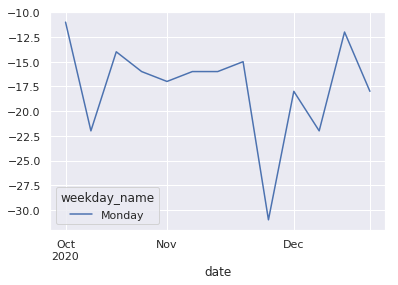

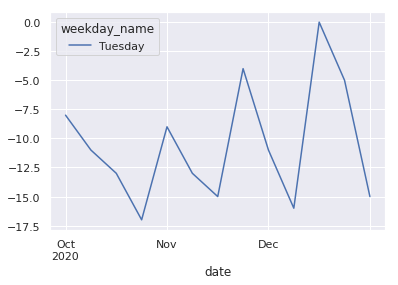

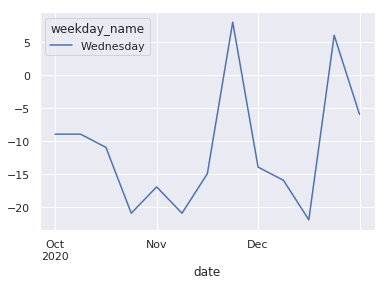

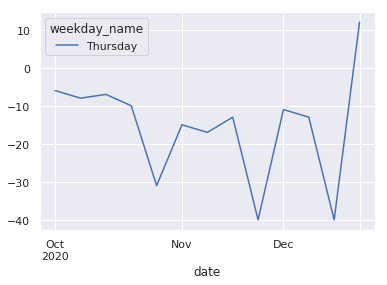

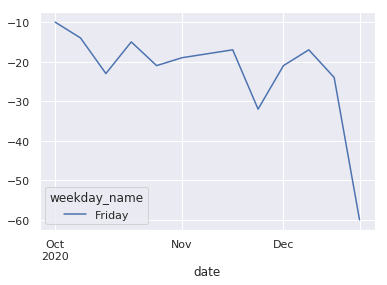

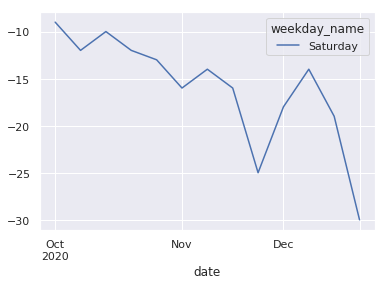

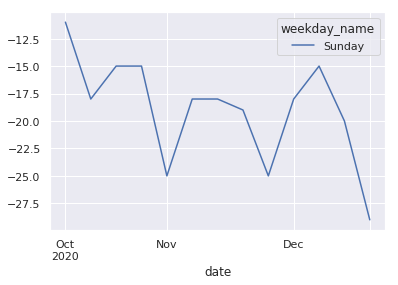

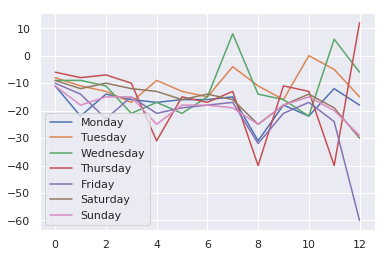

In [58]:
# Plot percent change of visits for groceries and pharmacies per day of the week 
weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
mobility_df_weekdays = mobility_df.pivot(index='date', columns='weekday_name', values='grocery_and_pharmacy_percent_change_from_baseline')

flatten_df = pd.DataFrame()
for i, day in enumerate(weekdays):
    series = mobility_df_weekdays[mobility_df_weekdays[day].isna() == False].reset_index()[:13] # Smallest count is 13 data points for one day of the week
    flatten_df = pd.concat([flatten_df, series[day]], axis=1)
    series[['date', day]].plot.line(x='date')

flatten_df.plot.line()

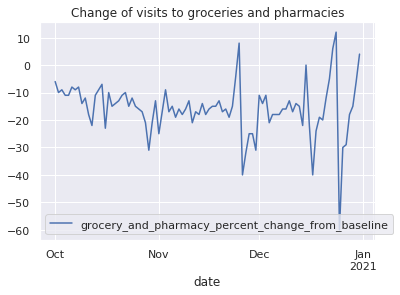

In [59]:
mobility_df[['grocery_and_pharmacy_percent_change_from_baseline','date']].plot.line(x='date', title = 'Change of visits to groceries and pharmacies')

In [60]:
# Export clean data frame into a csv
mobility_df.to_csv(f'{data_path}/raw/mobility/Philadelphia_Mobility_Clean.csv', index = False)